# First Thing!

Once you get the data files - please get them loaded into a Jupyter notebook.
They can take a while to get loaded into memory!

**Ask for help** if you have any problems!!

In [ ]:
import pandas as pd
q = pd.read_csv('data/questions.csv.gz',
                parse_dates=['CreationDate',
                             'ClosedDate',
                             'DeletionDate'])
qt = pd.read_csv('data/question_tags.csv.gz')

# PyData Calgary - September 2016

## Machine Learning with Python

### Plan for Tonight

* brief introduction to Pandas and Machine Learning
* Interactive - get some data and do some machine learning

### Housekeeping

* **Washrooms** are around the corner: leave the room, go right.
* In an **emergency**, our muster point is the Food Court in the Professional Faculties building. See [here](https://www.ucalgary.ca/emergencyplan/system/files/emergencyinstructions-taylorfamilydigitallibrary.pdf)

### Code of Conduct

To ensure the safety and comfort of attendees, we will be strictly following the [NumFOCUS Code of Conduct](http://www.numfocus.org/code-of-conduct.html) at this event and any other PyData Calgary events. 

The PyData Code of Conduct governs this meetup. To discuss any issues or concerns relating to the code of conduct or the behavior of anyone at a PyData meetup, please contact the organizer (Stephen Childs; Stephen.Childs@ucalgary.ca) or NumFOCUS Executive Director Leah Silen (+1 512-222-5449; leah@numfocus.org).

# PyData Calgary Introduction

* First (and only for now) PyData Meetup in Canada!
* 24 meetup groups across 5 continents!
* 11 countries

In [1]:
from IPython.display import IFrame

In [2]:
IFrame('http://www.meetup.com/pro/PyData/', width=1000, height=500)

In [5]:
import pandas as pd
import seaborn

%matplotlib inline
members = pd.read_csv('PyData-Calgary_Member_List_on_09-12-16.xls', sep='\t')
members.sort_values(by=['Joined Group on'], inplace=True)

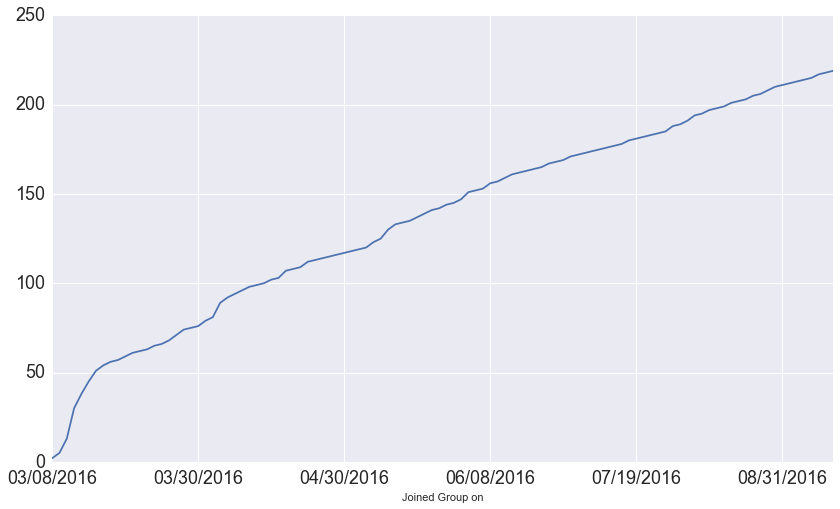

In [7]:
members.groupby(by='Joined Group on')['Member ID'].count().cumsum().plot(figsize=(14,8), fontsize=18)

## Group Update

* my goal has been to facilitate monthly meetups
* a talk and/or a interactive session
* working in groups seemed to work pretty well
* overall goal is to build up a community

#### Call for Volunteers

* We need people to volunteer to give a talk or lead an interactive session
* Great learning experience
* Does not take too much time to prepare - happy to help with it
* Part of a meetup

#### Sister Groups

* [Data for Good](http://www.meetup.com/Data-for-Good-Calgary/) - connecting data people with non-profits
* [PyYYC](http://www.meetup.com/py-yyc/) - Calgary Python group
* [PrarieML](http://www.meetup.com/PrairieML/) - Machine Learning

## News

**PyCon Canada**

* November 12-13 in Toronto
* I'm going!

# Machine Learning

* I am not an expert on machine learning
* My background is in statistics and econometrics

## Goal of Machine Learning

* make computers learn how to predict 

## Broad Categories of Machine Learning

* you can break down machine learning problems on two axes
    * Supervised vs. Unsupervised
    * Classification vs. Regression

### Supervised

* When your data includes the thing you are trying to predict
* This is known as **labeled** data
* e.g. you can see if a student will graduate or not

### Unsupervised

* When you want to infer the structure from **unlabled** data
* e.g. splitting things into *clusters*
* detecting anomolies

### Classification

* You have a small number of groups you are trying to predict membership in
* Discrete groups

### Regression

* You are trying to predict a number

## Machine Learning Algorithms

There are several different algorithms, ranging from models that statisticians would be familiar with to some ones that are quite complicated.

Which one to use is a bit beyond the scope of this talk -- but they are worth having a look at the Sci-Kit Learn Documentation.

![Classifications](plot_classifier_comparison_001.png)

### PyData and Machine Learning

* covering PyData and Scikit Learn
* other machine learning frameworks exits and have python bindings:
    * Caffe
    * TensorFlow

It is helpful to remember the "structure" of PyData projects to make working with Sci-Kit Learn easier

* NumPy
    * SciPy
    * Sci-Kit Learn
    * Pandas

* Pandas Series and DataFrames are built on NumPy arrays
* You can always get an underlying NumPy array out of a Pandas object (`values` attribute)
* Sci-Kit Learn is based on NumPy - so it expects NumPy arrays

In [ ]:
import pandas as pd
import sqlalchemy as sa
from patsy.highlevel import dmatrices
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

First we define our formula - basically R-style

In [ ]:
formula = "outcome ~ var1 + var2 + "
formula = formula + "var3 + var4"

Patsy's `dmatricies` method will take your data and return a couple of data frames based on that data.

In [ ]:
y, X = dmatrices(formula, data=df, return_type='dataframe')

then you can run the model.

In [ ]:
lr = LogisticRegression()

`cross_val_score` will return an array of scores. One for each cross valication (set the number with `cv`).

In [ ]:
scores = cross_val_score(lr, X, y['registered[True]'], cv=20, scoring='accuracy')

The `train_test_split` method will split up your matricies - into training and testing data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                        random_state=42)

Then you fit your data on the training data.

In [ ]:
lr.fit(X_train, y_train['registered[True]'])

If you want to put your predictions back into your dataset -- you can create a test indicator.

In [ ]:
df['test_ind'] = pd.Series(True, index = X_test.index)
df['test_ind'].fillna(value=False, inplace=True)

Here is the prediction part -- you can generate a series of predictions.
the `predict` method will return a NumPy array - so you can create a pandas Series for it by adding an index.
SciKit learn will preserve the order.

In [ ]:
df['registered_pred'] = pd.Series(lr.predict(X_test),
                                  index=X_test.index)

You can also generate a predicted probability for each observation.

In [ ]:
df['proba'] = pd.DataFrame(lr.predict_proba(X_test),
                           index=X_test.index)[1]

In [ ]:
model_score = lr.score(X_test, y_test['registered[True]'])
df['model_score'] = model_score

Data Loading Slide Again

In [ ]:
import pandas as pd
q = pd.read_csv('data/questions.csv.gz',
                parse_dates=['CreationDate',
                             'ClosedDate',
                             'DeletionDate'])
qt = pd.read_csv('data/question_tags.csv.gz')

# The Challenge (Interactive Part)

* get into groups (2-3 or larger if necessary)
* try to pair with someone with a differnet level of experience than you
* load the StackLite data -- and try to make some predictions.

This data contains:

* Question ID
* Creation date
* Closed date, if applicable
* Deletion date, if applicable
* Score
* Owner user ID
* Number of answers
* Tags

There are a few things you might want to try to predict:
* if a question will be closed
* if a question will be deleted
* the score of a question
* the number of answers it receives

* Your first step is to put the data into the correct format for analysis
* You want to create _features_ out of this data
* The tags file contains important data -- the subject of your question BUT questions can have multiple tags
* Once you have all everything you will use in your analysis - you want to create your analysis dataframes -- design matricies
* One of the first things you want to do is create a "holdout set" - save some data for your final test. The `train_test_split` method should work well for that.